<a href="https://colab.research.google.com/github/jul1andav1d/Food-items-sales-predictions/blob/main/Machine_Learning_Food_and_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The goal of this step is to help the retailer by using machine learning to make predictions about future sales based on the data provided.
- Going back to original dataset with the goal of preventing data leakage.

#- PROJECT 1, PART 5

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display='diagram')
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer

In [2]:
salesPredictions = '/content/drive/MyDrive/Data Science - Coding Dojo/DataSci Week 2 Underst Data/sales_predictions.csv'
food_sales = pd.read_csv(salesPredictions)
food_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
food_sales.duplicated().sum()

0

In [4]:
food_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
food_sales.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
#Identify the target (X) and features (y):
y = food_sales['Item_Outlet_Sales']
X = food_sales.drop(columns = ['Item_Outlet_Sales', 'Item_Identifier'])

In [7]:
#Perform a train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
#Create a pre processing pipeline to prepare the dataset for Machine Learning
num_select = make_column_selector(dtype_include='number')
cat_select = make_column_selector(dtype_include='object')

In [9]:
mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')
scaler = StandardScaler()
ohe_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [10]:
#Create pipes
pipe_numeric = make_pipeline(mean_imputer, scaler)
pipe_categ = make_pipeline(freq_imputer, ohe_encoder)

In [11]:
tuple_numeric = (pipe_numeric, num_select)
tuple_categ = (pipe_categ, cat_select)

In [12]:
column_transformer = make_column_transformer(tuple_numeric, tuple_categ) # MAke a column transformer


#- PROJECT 1, FINAL

#LINEAR REGRESSION


In [13]:
#Linear Regression
lin_reg = LinearRegression()

In [14]:
foodpipe = make_pipeline(column_transformer, lin_reg)
foodpipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f662e3efb10>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f662e3ef7d0>)])),
                ('linearregression', LinearRegression())])

In [15]:
#fit pipe on the training data
foodpipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f662e3efb10>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f662e3ef7d0>)])),
                ('linearregression', LinearRegression())])

#EVALUATE WITH R2

In [16]:
#Predict the values on both sets
trainpreds = foodpipe.predict(X_train)
testpreds = foodpipe.predict(X_test)

In [17]:
#Score the model with R2
r2_score(y_train, trainpreds)

0.5616656222504928

In [18]:
r2_score(y_test, testpreds)

0.5669658698501312

In [19]:
fpscore2_train = foodpipe.score(X_train, y_train)
fpscore2_train

0.5616656222504928

In [20]:
fpscore2_test = foodpipe.score(X_test, y_test)
fpscore2_test

0.5669658698501312

#RMSE

In [21]:
#Score with RMSE

#Import
import numpy as np
from sklearn.metrics import mean_squared_error

In [22]:
#Now to get the MSE on Training Data
msetrain = mean_squared_error(y_train, trainpreds)
print(msetrain)

1297231.1747208787


In [23]:
#RMSE
np.sqrt(msetrain)

1138.9605676760186

In [24]:
#Now on Testing Data
msetest = mean_squared_error(y_test, testpreds)
print(msetest)

1194731.329928599


In [25]:
#RMSE on test
np.sqrt(msetest)

1093.037661715551

#REGRESSION TREE MODEL

In [26]:
from sklearn.tree import DecisionTreeRegressor

In [27]:
dec_tree = DecisionTreeRegressor(random_state=42)

In [28]:
foodpipe_tree = make_pipeline(column_transformer, dec_tree)

In [29]:
foodpipe_tree.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f662e3efb10>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f662e3ef7d0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

#EVALUTE WITH R2

In [30]:
trainpipe_treescore = foodpipe_tree.score(X_train,y_train)
testpipe_treescore = foodpipe_tree.score(X_test, y_test)

In [31]:
trainpipe_treescore

1.0

In [32]:
testpipe_treescore

0.192661221937389

#RMSE

In [33]:
trainpipe_preds = foodpipe_tree.predict(X_train)
testpipe_preds = foodpipe_tree.predict(X_test)

In [34]:
mse_train = mean_squared_error(y_train, trainpipe_preds)
mse_test = mean_squared_error(y_test, testpipe_preds)
print(msetrain)
print(mse_test)

1297231.1747208787
2227429.352240321


In [35]:
np.sqrt(mse_train)

0.0

In [36]:
np.sqrt(mse_test)

1492.4574875822498

#Which model would I recommend?

From my point of view, the linear regression had better performance than the other metric model. As it showed more even results when analyzing both the real data and the test data.

#- VISUALIZATIONS

Show visualizations for better understanding

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import mplcyberpunk

In [49]:
!pip install mplcyberpunk

In [42]:
visibility = food_sales.groupby('Item_Type')[['Item_Visibility']].mean()
visibility = visibility.sort_values(by = 'Item_Visibility')
itemtype = food_sales['Item_Type'].values
fat = food_sales['Item_Fat_Content'].values

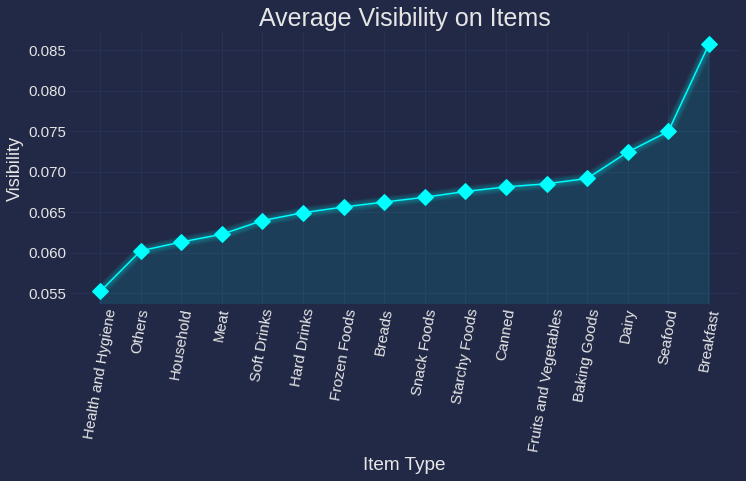

In [53]:
plt.figure(figsize = (12, 5))
plt.style.use('cyberpunk')
plt.plot(visibility.index, visibility['Item_Visibility'], 
         c = 'cyan', marker = 'D', markersize = 12)
plt.xlabel('Item Type', fontsize = 19)
plt.xticks(rotation = 80, fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Visibility', fontsize = 18)
plt.title('Average Visibility on Items', fontsize = 25)
mplcyberpunk.add_glow_effects()
plt.show();

In [55]:
meansales= food_sales.groupby('Item_Type')[['Item_Outlet_Sales']].mean()
meansales = meansales.sort_values(by = 'Item_Outlet_Sales')
meansales

,Item_Outlet_Sales
Item_Type,
Others,1926.139702
Baking Goods,1952.971207
Soft Drinks,2006.511735
Health and Hygiene,2010.000265
Breakfast,2111.808651
Frozen Foods,2132.867744
Hard Drinks,2139.221622
Meat,2158.977911
Breads,2204.132226


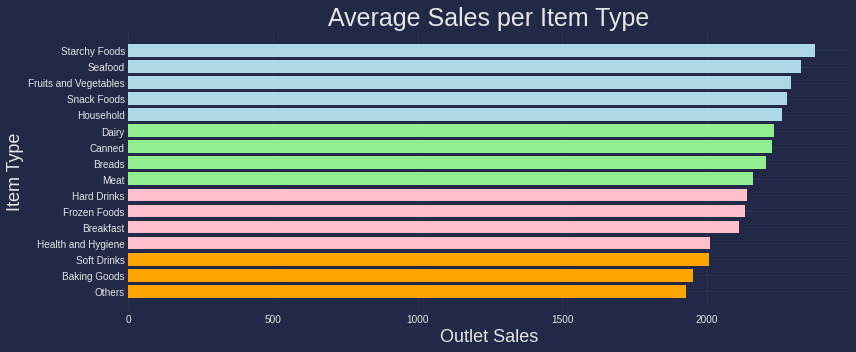

In [56]:
plt.style.use('cyberpunk')

plt.figure(figsize= (12, 5))
plt.barh(meansales.index, meansales['Item_Outlet_Sales'], color = ['orange','orange','orange','pink', 'pink','pink', 'pink', 
                                                                   'lightgreen', 'lightgreen', 'lightgreen','lightgreen', 
                                                                   'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', ])
plt.xlabel('Outlet Sales', fontsize=18,)
plt.ylabel('Item Type', fontsize=18)
plt.title('Average Sales per Item Type', fontsize = 25)
plt.tight_layout()
plt.show();